###Atharva Mankame [21BAI1780]

### 1. Do the necessary pre-processing using the appropriate strategies and explore the dataset details.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [41]:
df = pd.read_csv("1D_Dataset.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000,0.758,0.112,0.000,0.0806,0.07850,0.0661,0.04960,0.0475,0.0351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908,0.784,0.531,0.363,0.3660,0.34400,0.3330,0.30800,0.2970,0.3000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730,0.212,0.000,0.119,0.1020,0.10200,0.1110,0.12400,0.1150,0.1330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000,0.910,0.681,0.473,0.2290,0.06880,0.0000,0.00417,0.0146,0.0542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570,0.399,0.238,0.148,0.0000,0.00336,0.0403,0.08050,0.0705,0.0906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.929,0.871,0.805,0.743,0.6510,0.53600,0.3940,0.25100,0.1400,0.1020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.803,0.692,0.587,0.447,0.3180,0.19000,0.1180,0.07770,0.1120,0.1520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000,0.967,0.620,0.347,0.1390,0.08900,0.1040,0.10100,0.1070,0.1010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984,0.567,0.607,0.583,0.6070,0.57500,0.5750,0.48800,0.3930,0.2380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [42]:
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [43]:
df[len(df.columns)-1].unique()

array([0., 1., 2., 3., 4.])

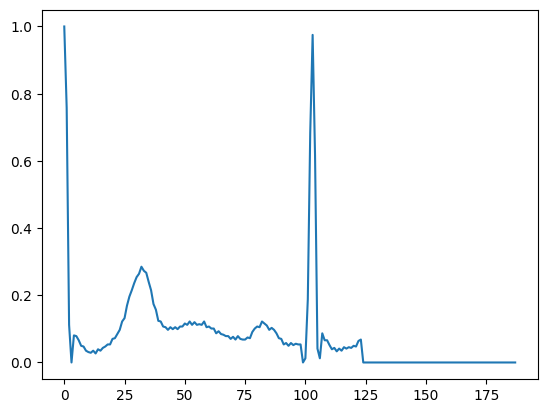

In [44]:
plt.plot(df.iloc[0])

In [45]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [47]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1],1)))
model.add(MaxPooling1D(pool_size=3))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [48]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test,y_test))

Epoch 1/10
274/274 [==============================] - 9s 32ms/step - loss: 0.4755 - accuracy: 0.8679 - val_loss: 0.3335 - val_accuracy: 0.9016
Epoch 2/10
274/274 [==============================] - 8s 31ms/step - loss: 0.2775 - accuracy: 0.9199 - val_loss: 0.2565 - val_accuracy: 0.9249
Epoch 3/10
274/274 [==============================] - 9s 33ms/step - loss: 0.2263 - accuracy: 0.9395 - val_loss: 0.2441 - val_accuracy: 0.9374
Epoch 4/10
274/274 [==============================] - 4s 15ms/step - loss: 0.2022 - accuracy: 0.9475 - val_loss: 0.1984 - val_accuracy: 0.9441
Epoch 5/10
274/274 [==============================] - 5s 19ms/step - loss: 0.1822 - accuracy: 0.9520 - val_loss: 0.1871 - val_accuracy: 0.9486
Epoch 6/10
274/274 [==============================] - 4s 15ms/step - loss: 0.1715 - accuracy: 0.9540 - val_loss: 0.1912 - val_accuracy: 0.9406
Epoch 7/10
274/274 [==============================] - 4s 14ms/step - loss: 0.1622 - accuracy: 0.9574 - val_loss: 0.1813 - val_accuracy: 0.9468

In [50]:
!pip install scikeras

### 2. Design 1D CNN model and identify the best model with suitable performance metrics using hyperparameter tuning method.

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [52]:
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [53]:
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64, verbose=0)
param_grid = {
    'optimizer': ['adam', 'rmsprop', 'adadelta'],
}

In [54]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [55]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.956490 using {'optimizer': 'rmsprop'}


### 3. Train the best model with 3-fold cross validation and plot the performance of all three folds as a box plot.

In [56]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import clone_model

In [57]:
best_optimizer = grid_result.best_params_['optimizer']
best_model = create_model(optimizer=best_optimizer)
best_model.compile(loss='sparse_categorical_crossentropy', optimizer=best_optimizer, metrics=['accuracy'])  # compiling the model

In [58]:
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [59]:
acc_per_fold = []
loss_per_fold = []

for train, val in kfold.split(X_train, y_train):
    model_clone = clone_model(best_model)
    model_clone.compile(loss='sparse_categorical_crossentropy', optimizer=best_optimizer, metrics=['accuracy'])  # compiling the cloned model
    model_clone.set_weights(best_model.get_weights()) # taking the weights from best model
    history = model_clone.fit(X_train[train], y_train[train], epochs=10, batch_size=64, validation_data=(X_train[val], y_train[val]), verbose=0)

    scores = model_clone.evaluate(X_train[val], y_train[val], verbose=0)
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

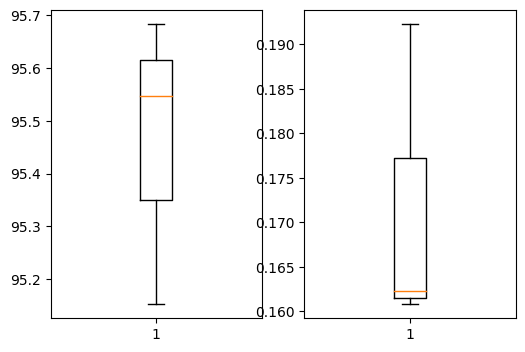

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(6, 4))
ax[0].boxplot(acc_per_fold)
ax[1].boxplot(loss_per_fold)
plt.show()